In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#Data Load
file_path = r'C:\Users\CHOI.DESKTOP-R51MDOU\OneDrive - 가천대학교\바탕 화면\Coding\AI Introduction\abalone.csv'
df = pd.read_csv(file_path)

#데이터 시각화
display(df)
print(df.columns)

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


In [3]:
#결측치에 대한 확인
missing_values = df.isnull().sum()

print(missing_values)

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


In [4]:
#char형 data를 숫자로 변환 필요
#label을 숫자로 encode
label_encoder = LabelEncoder()

df["Sex"] = label_encoder.fit_transform(df["Sex"].astype(str))

df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
#특성과 타겟 분리 (특성 : X, 타겟 : y)
X = df.drop('Rings', axis = 1)
y = df['Rings']

#trained data와 test data 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3341, 9) (3341,)
(836, 9) (836,)


In [6]:
#models 정의 : linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)
print('평균 제곱근 오차', mean_squared_error(ly_preds, y_test))

평균 제곱근 오차 4.642270862135666


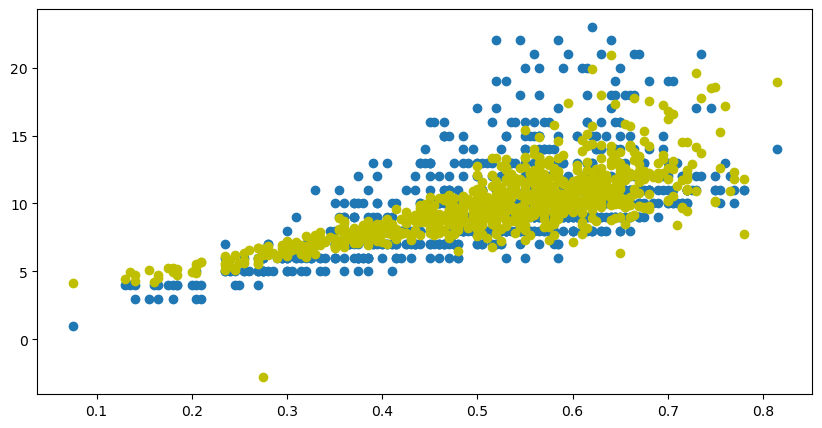

In [11]:
# 산점도 그래프 생성 (linear)
plt.figure(figsize = (10, 5))
plt.scatter(X_test['Length'], y_test, label = 'y_test')
plt.scatter(X_test['Length'], ly_preds, c = 'y', label = 'ly_preds')
plt.show()

In [12]:
#models 정의 : DT Regression
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)
print('평균 제곱근 오차', mean_squared_error(dy_preds, y_test))

평균 제곱근 오차 8.009569377990431


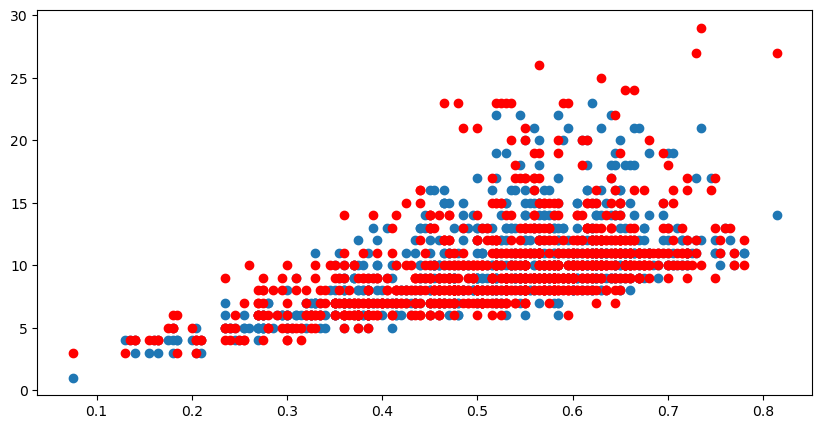

In [13]:
# 산점도 그래프 생성 (DT)
plt.figure(figsize = (10, 5))
plt.scatter(X_test['Length'], y_test, label = 'y_test')
plt.scatter(X_test['Length'], dy_preds, c = 'r', label = 'dy_preds')
plt.show()

In [14]:
#model 정의 : RF Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
ry_preds = model.predict(X_test)
print('평균 제곱근 오차', mean_squared_error(ry_preds, y_test))

평균 제곱근 오차 3.3679375598086123


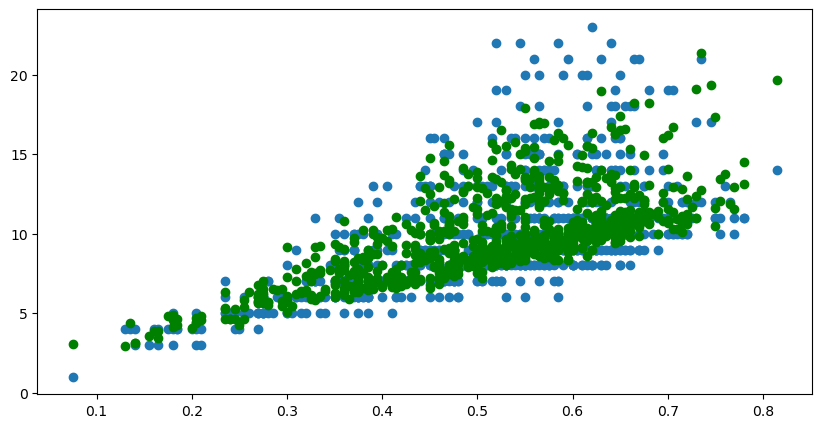

In [15]:
# 산점도 그래프 생성 (RF)
plt.figure(figsize = (10, 5))
plt.scatter(X_test['Length'], y_test, label = 'y_test')
plt.scatter(X_test['Length'], ry_preds, c = 'g', label = 'ry_preds')
plt.show()